# แบบฝึกหัด 7

---

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ztest

7.1 จากการเก็บข้อมูลของบูธร้านค้าร้านหนึ่งในงานเกษตรแฟร์โดยสุ่มตัวอย่างลูกค้ามาทั้งหมด 200 คน พบว่ามีอายุเฉลี่ย 42.8 ปี ส่วนเบี่ยงเบนมาตราฐาน 6.89 ปี ผู้ประกอบการร้านแห่งนี้จึงตั้งสมมุติฐานว่า ลูกค้าของทางร้านมีอายุเฉลี่ยสูงกว่า 40 ปี ที่ระดับนัยสำคัญ 0.01 สมมุติฐานนี้ถูกต้องหรือไม่ หากกำหนดให้การแจกแจงของอายุเป็นแบบปกติ  

ไม่ทราบความแปรปรวนของประชากร ตัวอย่างมีขนาดใหญ่ สถิติที่ใช้ทดสอบคือ Z  
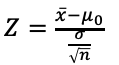

ให้ 𝜇 คือ อายุโดยเฉลี่ยของลูกค้าร้านแห่งหนึ่งที่ตั้งบูธขายของช่วงเกษตรแฟร์

ตั้งสมมติฐาน:  
H<sub>0</sub>:  𝜇≤40  
H<sub>1</sub>:  𝜇>40   

In [ ]:
#คำนวณ Z_cal
z_cal = (42.8-40) / (6.89/np.sqrt(200))
z_cal

5.747166871762936

In [ ]:
#คำนวณ Z_crit
z_crit = stats.norm.isf(0.01)
z_crit 

2.3263478740408408

**z_cal อยู่ในบริเวณวิกฤต จึงปฏิเสธ H<sub>0</sub> และยอมรับ H<sub>1</sub> นั่นคือ  ลูกค้าของทางร้านแห่งนี้มีอายุเฉลี่ยสูงกว่า 40 ปี ที่ระดับนัยสำคัญ 0.01**

\
หรือคำนวณค่า p-value

In [ ]:
p_val = stats.norm.sf(Z_cal)
p_val

4.537557863298819e-09

**ค่า p_val < 0.01 จึงปฏิเสธ H<sub>0</sub> และยอมรับ H<sub>1</sub> นั่นคือ  ลูกค้าของทางร้านแห่งนี้มีอายุเฉลี่ยสูงกว่า 40 ปี ที่ระดับนัยสำคัญ 0.01**

###   

7.2 สุ่มตัวอย่างผลิตภัณฑ์ซักล้างยี่ห้อหนึ่งมาจำนวน 8 ชิ้นเพื่อวัดปริมาณสารพิษ พบว่าได้ปริมาณดังนี้ (10<sup>6</sup>ppm) 15, 8, 10, 13, 6, 16, 11, 18 จงทดสอบว่าปริมาณสารพิษของผลิตภัณฑ์ซักล้างยี่ห้อนี้มากกว่าหรือเท่ากับ (≥) 18x10<sup>6</sup>ppm ที่ระดับนัยสำคัญ 0.05 หรือไม่ หากกำหนดให้ปริมาณสารพิษชนิดนี้มีการแจกแจงแบบปกติ      

ไม่ทราบความแปรปรวนของประชากร ตัวอย่างมีขนาดเล็ก สถิติที่ใช้ทดสอบคือ t  
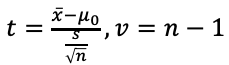

ให้ 𝜇 คือ ปริมาณสารพิษของผลิตภัณฑ์ซักล้างยี่ห้อหนึ่งโดยเฉลี่ย

ตั้งสมมติฐาน:  
H<sub>0</sub>:  𝜇≥18  
H<sub>1</sub>:  𝜇<18   

In [ ]:
#หาค่า xbar, s
toxics_quan = [15, 8, 10, 13, 6, 16, 11, 18]
xbar = np.mean(toxics_quan) 
s = np.std(toxics_quan, ddof=1)
print(xbar,s)

12.125 4.120939559996343


In [ ]:
#คำนวณ t_cal
t_cal = (xbar-18) / (s/np.sqrt(8))
t_cal

-4.032335130364934

In [ ]:
#คำนวณ t_crit
t_crit = stats.t.ppf(0.05, df=7)
t_crit

-1.8945786050613054

**t_cal อยู่ในบริเวณวิกฤต จึงปฏิเสธ H<sub>0</sub> และยอมรับ H<sub>1</sub> นั่นคือ  ปริมาณสารพิษของผลิตภัณฑ์ซักล้างยี่ห้อนี้น้อยกว่า 18x10<sup>6</sup>ppm ที่ระดับนัยสำคัญ 0.05**

\
หรือคำนวณค่า p-value

In [ ]:
p_val = stats.t.cdf(t_cal, df=7)
p_val

0.0024905124764684917

**p-value < 0.05 จึงปฏิเสธ H<sub>0</sub> และยอมรับ H<sub>1</sub> นั่นคือ  ปริมาณสารพิษของผลิตภัณฑ์ซักล้างยี่ห้อนี้น้อยกว่า 18x10<sup>6</sup>ppm ที่ระดับนัยสำคัญ 0.05**

\
หรือหาค่า p-value โดยใช้ stats.ttest_1samp:

In [ ]:
t_cal, p_value  = stats.ttest_1samp(a=toxics_quan,
                                    popmean=18,
                                    alternative='less')
print(t_cal, p_value)

-4.032335130364934 0.0024905124764684917


###   

7.3 ทำการ ping 158.108.216.5 จำนวน 10 ครั้ง ได้ระยะเวลาในหน่วย ms (milliseconds) ดังนี้ 28.2, 26.5, 30.7, 24.1, 25.3, 29.2, 21.6, 26.7, 23.4, 27.3 จงทดสอบว่าระยะเวลาที่ใช้ในการ ping โดยเฉลี่ยมีค่าเท่ากับ 26 ms หรือไม่ที่ระดับนัยสำคัญ 0.05 หากทราบมาว่าระยะเวลาที่ใช้ในการ ping มีการแจกแจงแบบปกติ

ไม่ทราบความแปรปรวนของประชากร ตัวอย่างมีขนาดเล็ก สถิติที่ใช้ทดสอบคือ t  
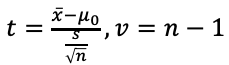

ให้ 𝜇 คือ ระยะเวลาที่ใช้ในการ ping 158.108.216.5 โดยเฉลี่ย

ตั้งสมมติฐาน:  
H<sub>0</sub>:  𝜇=26  
H<sub>1</sub>:  𝜇≠26   

In [ ]:
ping = [28.2, 26.5, 30.7, 24.1, 25.3, 29.2, 21.6, 26.7, 23.4, 27.3]
t_cal, p_value  = stats.ttest_1samp(a=ping,
                                    popmean=26,
                                    alternative='two-sided')
print(t_cal, p_value)

0.3428229400069507 0.7396027657579756


**p-value > 0.05 จึงยอมรับ H<sub>0</sub>  นั่นคือ  ระยะเวลาที่ใช้ในการ ping โดยเฉลี่ยมีค่าเท่ากับ 26 ms ที่ระดับนัยสำคัญ 0.05**

In [ ]:
#หากต้องการทราบ t_crit
t_crit_left = stats.t.ppf(0.05/2, df=9)
t_crit_right = stats.t.isf(0.05/2, df=9)
print(t_crit_left, t_crit_right)

-2.262157162740992 2.262157162740992


###   

7.4 ห้องปฏิบัติการ 2 แห่ง สุ่มตรวจสอบปริมาณนิโคตินในบุหรี่ยี่ห้อหนึ่งด้ผลการวิเคราะห์ปริมาณนิโคติน (มิลลิกรัม) ดังนี้  
ห้องปฏิบัติการ1: 56, 37, 61, 56, 65, 41, 63, 50, 42   
ห้องปฏิบัติการ2: 46, 25, 46, 64, 34, 56   
จงทดสอบสมมติฐานว่าปริมาณนิโคตินที่วิเคราะห์ได้โดยห้องปฏิบัติการสองแห่งนี้ไม่แตกต่างกัน
ที่ระดับนัยสำคัญ 0.10 หากกำหนดให้ปริมาณนิโคตินในบุหรี่ที่วิเคราะห์ได้โดยห้องปฏิบัติการทั้งสองมีการ
แจกแจงแบบปกติที่มีค่าความแปรปรวนเท่ากัน  

ไม่ทราบความแปรปรวนของประชากร ตัวอย่างมีขนาดเล็ก แต่ทราบว่าความแปรปรวนเท่ากัน สถิติทดสอบคือ t  
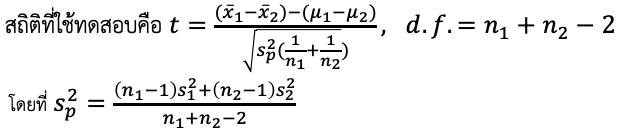

ให้ 𝜇<sub>1</sub> คือ ปริมาณนิโคตินในบุหรี่ยี่ห้อหนึ่งที่วัดได้จากห้องปฏิบัติการ1  
𝜇<sub>2</sub> คือ ปริมาณนิโคตินในบุหรี่ยี่ห้อหนึ่งที่วัดได้จากห้องปฏิบัติการ2

ตั้งสมมติฐาน:  
H<sub>0</sub>:  𝜇<sub>1</sub>-𝜇<sub>2</sub>=0  
H<sub>1</sub>:  𝜇<sub>1</sub>-𝜇<sub>2</sub>≠0   

In [ ]:
lab1 = [56, 37, 61, 56, 65, 41, 63, 50, 42]
lab2 = [46, 25, 46, 64, 34, 56]
stats.ttest_ind(a=lab1,
                b=lab2,
                alternative='two-sided',
                equal_var=True)

Ttest_indResult(statistic=1.1377678816988284, pvalue=0.2757530487532558)

**p-value > 0.10 จึงยอมรับ H<sub>0</sub>  นั่นคือปริมาณนิโคตินที่วิเคราะห์ได้โดยห้องปฏิบัติการสองแห่งนี้ไม่แตกต่างกัน ที่ระดับนัยสำคัญ 0.10**

In [ ]:
#หากต้องการทราบ t_crit
t_crit_left = stats.t.ppf(0.1/2, df=len(lab1)+len(lab2)-2)
t_crit_right = stats.t.isf(0.1/2, df=len(lab1)+len(lab2)-2)
print(t_crit_left, t_crit_right)

-1.7709333959867992 1.7709333959867992


###   

7.5 เครื่องใช้พลาสติกชนิดหนึ่ง ผลิตโดยกระบวนการผลิตแตกต่างกัน 2 วิธี คือ A และ B ต้องการตรวจสอบความ
เหนียวของพลาสติกที่ผลิตได้โดยทั้งสองกระบวนการนี้ว่าแตกต่างกันหรือไม่ จึงสุ่มตัวอย่าง
ผลิตภัณฑ์จากกระบวนการผลิต A มา 30 ชิ้น ทดสอบและคำนวณค่าความเหนียวเฉลี่ยได้เป็น
28.3 ส่วนเบี่ยงเบนมาตรฐาน 3.3 เมื่อสุ่มผลิตภัณฑ์จากกระบวนการผลิต B 40 ชิ้น คำนวณค่าความเหนียวเฉลี่ยได้เป็น 26.7 ส่วนเบี่ยงเบนมาตรฐานเป็น 4.9 หากการทดสอบโดยใช้ระดับนัยสำคัญ 0.05  

ไม่ทราบความแปรปรวนของประชากร และตัวอย่างมีขนาดใหญ่ ใช้ Z ในการทดสอบ  
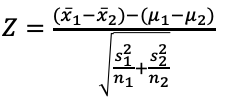

ให้ 𝜇<sub>1</sub> คือ ค่าความเหนียวเฉลี่ยของพลาสติกที่ผลิตโดยกระบวนการผลิต A  
𝜇<sub>2</sub> คือ ค่าความเหนียวเฉลี่ยของพลาสติกที่ผลิตโดยกระบวนการผลิต B

ตั้งสมมติฐาน:  
H<sub>0</sub>:  𝜇<sub>1</sub>-𝜇<sub>2</sub>=0  
H<sub>1</sub>:  𝜇<sub>1</sub>-𝜇<sub>2</sub>≠0   

In [ ]:
#คำนวณ z_cal
z_cal = ((28.3-26.7)-0)/np.sqrt(3.3**2/30 + 4.9**2/40)
z_cal

1.6302359794089838

In [ ]:
#คำนวณ z_crit
z_crit_left = stats.norm.ppf(0.05/2)
z_crit_right = stats.norm.isf(0.05/2)
print(z_crit_left, z_crit_right)

-1.9599639845400545 1.9599639845400545


In [ ]:
#คำนวณ p-value
p_val = 2*stats.norm.sf(abs(z_cal))
p_val

0.10305163240311598

**z_cal ตกในบริเวณยอมรับ H<sub>0</sub> และ p-val>0.05 จึงต้องยอมรับ H<sub>0</sub> คือความ เหนียวของพลาสติกที่ผลิตได้โดยทั้งสองกระบวนการนี้ไม่แตกต่างกัน**